In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cardio_train_data.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# <h2>Basic Information About Data</h2>

In [ ]:
print("Total Rows and Columns:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

In [ ]:
#information about columns
df.info()

In [ ]:
#checking null values
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.describe()

In [ ]:
#find the correlation between the variables
sns.heatmap(df.corr())
plt.show()

In [ ]:
#checking outliers for weight
sns.boxplot(df.weight)
plt.show()

In [ ]:
#checking the outliers for height
sns.boxplot(df.height)
plt.show()

# EDA (Exploratory Data Analysis)

# <h4>
1. Patients with cardiac diseases,find the difference and percentage ratio between male and female.
    
2. Find the correlation between ap_hi and ap_low for both the gender with scatter plot
    
3. Finds which age group has more affected by cardiac disease.
    
4. Find the percentage of patients having cardiovascular disorder with ap\_hi and weight more than their respective means and      write your conclusion about it. 
   Does high ap\_hi and high weight play an important role for cardiac health?
    
5. Which cholesterol level has the highest cardiac disease patients and also find the 
   percentage of male and females in all the categories.
    
6. Find the percentage of the patients having cardiac disorders with age greater than 45?
   what are the factors affecting heart health which needs to be taken care about?
   What are the factors or information of the first screening which helps us understand that the patient might
   have a heart disease?
    
7. Make the groups of height and weight:  
   Find which category has the highest percentage of cardiac disease patients?
    a. short height and less weight
    b. big height and more weight
    c. short height and more weight
    d. big height and less weight

8. Do univariate and bivariate analysis
</h4>

# <h3> <center>Cardiac Disorders Patients Data Analysis</center></h3>

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#create a new column age(in year)
df['age(in year)']=df['age'].apply(lambda x:round(x/365))

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age(in year)
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


# <h3>Q. Patients with cardiac diseases,find the difference and percentage ratio between male and female.</h3>

In [43]:
cardio_df=df[df['cardio']==1]

In [44]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age(in year)
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1,46


In [ ]:
cardio_df.shape

In [ ]:
cardio_df.value_counts('gender')

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Total Male & Female")
cardio_df.value_counts('gender').plot(kind='bar')
# sns.countplot(cardio_df.gender)
plt.ylabel("Total")
plt.show()

In [ ]:
cdf=cardio_df.groupby('gender')['id'].count().reset_index()

In [ ]:
cdf=cdf.rename(columns={'id':'total'})

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Male & Female Percentage with Cardiac Diseases",fontsize='14')
plt.pie(cdf.total,labels=cdf.gender,autopct="%0.1f%%")
plt.legend(loc='best')
plt.show()

In [ ]:
# total_gender_count=34979
# male_percentage=round((22616/total_gender_count)*100,2)
# female_percentage=round((12363/total_gender_count)*100,2)
# print("Percentage wise total Male ad Female with cardiac disease:")
# print(f"Male:{male_percentage}%")
# print(f"Female:{female_percentage}%")

# <h4>
- 22616 Male Patients
- 12363 Female Patients

</h4>

# <h3>Q. Find the correlation between ap_hi and ap_low for both the gender with scatter plot</h3>

In [ ]:
cardio_df.head()

In [ ]:
co=cardio_df['ap_hi'].corr(cardio_df['ap_lo'])
print(f"Correlation between ap_hi and ap_lo: {co}")

In [ ]:
plt.figure(figsize=(10,6))
# sns.scatterplot(cardio_df.ap_lo,cardio_df.ap_hi)
plt.title('Relation between ap_hi and ap_lo',fontsize='14')
sns.lineplot(cardio_df.ap_lo,cardio_df.ap_hi)
plt.xlabel('ap_lo',fontsize='12')
plt.ylabel('ap_hi',fontsize='12')
plt.show()

# <h4>
- Correlation between ap_lo and ap_hi is 0.01339
</h4>

# <h3>Q. Finds which age group has more affected by cardiac disease</h3>

In [ ]:
cardio_df.head()

In [ ]:
cardio_df['age(in year)'].unique()

In [ ]:
#create a new column 'age_group'

In [ ]:
def age_group(x):
    if x<=10:
        return "0-10"
    elif x>10 and x<=20:
        return "11-20"
    elif x>20 and x<=30:
        return "21-30"
    elif x>30 and x<=40:
        return "31-40"
    elif x>40 and x<=50:
        return "41-50"
    elif x>50 and x<=60:
        return "51-60"
    elif x>60 and x<=70:
        return "61-70"
   
   

In [ ]:
df['age_group']=df['age(in year)'].apply(age_group)

In [ ]:
df.head()

In [ ]:
df.age_group.unique()

In [ ]:
cardio_df=df[df['cardio']==1]

In [ ]:
cardio_df.head()

In [ ]:
#using histogram
plt.title("Age Wise Cardiac Patients",fontsize='14')
# sns.histplot(cardio_df['age(in year)'],bins=15)
plt.hist(cardio_df['age(in year)'],bins=10)
plt.show()

In [ ]:
#using bar graph
cdf=cardio_df.groupby('age_group')['cardio'].count().reset_index()

In [ ]:
cdf

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Age_Group Wise Cardiac Patients",fontsize='14')
p=sns.barplot(x=cdf.age_group,y=cdf.cardio)
for i in p.containers:
    plt.bar_label(i)
plt.xlabel('Age_Group',fontsize='10')
plt.ylabel('Total Patients',fontsize='10')
plt.show()

In [ ]:
#with age group 51-60

In [ ]:
cdf[cdf['age_group']=='51-60']

# <h4>
Age Group wise cardiac patients:
1. 50-60 age group are more affected by cardiac disease
2. Then 41-50 age group
3. Then 61-70 age group
</h4>

# <h3>Q.Find the percentage of patients having cardiovascular disorder with ap_hi and weight more than their respective means and write your conclusion about it. Does high ap_hi and high weight play an important role for cardiac health?</h3>

In [ ]:
cardio_df.head()

In [ ]:
mean_weight=round(cardio_df.weight.mean(),1)

In [ ]:
mean_weight

In [ ]:
mean_ap_hi=round(cardio_df.ap_hi.mean())

In [ ]:
mean_ap_hi

In [ ]:
ap_hi_weight=cardio_df[(cardio_df['ap_hi']>mean_ap_hi) & (cardio_df['weight']>mean_weight)]  #weight >average weight

In [ ]:
ap_hi_weight.head()

In [ ]:
ap_hi_weight.value_counts('gender')

In [ ]:
plt.figure(figsize=(10,6))
plt.title('High BP and High Weight Cardiac Patients',fontsize='14')
ap_hi_weight.value_counts('gender').plot(kind='pie',autopct='%0.1f%%',labels=ap_hi_weight.gender)
plt.legend()
plt.show()

In [ ]:
ap_hi_weight.value_counts('smoke')

In [ ]:
#very less patients are smoking

In [ ]:
#1 = Normal, 2 = Slightly above normal, 3 = High cholesterol
plt.title('Cholesterol Level wise Patients')
ap_hi_weight.value_counts('cholesterol').plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [ ]:
# Most of the patients with Normal cholesterol

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Based on Drinking Alcohol Cardiac Patients')
ap_hi_weight.groupby('alco')['cardio'].count().plot(kind='pie',autopct='%0.1f%%')
plt.show()

# <h4>Very less people are smoking with high BP and high weight</h4>

In [ ]:
#1 = Normal, 2 = Slightly above normal, 3 = High sugar level
ap_hi_weight.value_counts('gluc')

In [ ]:
#6475 peoples are with Normal sugar level

In [ ]:
ap_hi_weight.value_counts('age_group')

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Group wise High BP and High Weight Patients')
ap_hi_weight.value_counts('age_group').plot(kind='pie',autopct='%0.1f%%')
plt.show()

# <h4>
*With ap_hi and high weight, 51-60 age group are more affected</h4>

# <h3>Q. With low bp and low weight cardiac disorder patients analysis.</h3>

In [ ]:
lo_ap_weight=cardio_df[(cardio_df['ap_hi']<mean_ap_hi) & (cardio_df['weight']<mean_weight)]

In [ ]:
lo_ap_weight.head()

In [ ]:
lo_ap_weight.value_counts('gender')

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Low BP and Low Weight Cardiac Patients',fontsize='14')
lo_ap_weight.value_counts('gender').plot(kind='pie',autopct='%0.1f%%',labels=lo_ap_weight.gender)
plt.legend()
plt.show()

In [ ]:
lo_ap_weight.value_counts('cholesterol')

In [ ]:
lo_ap_weight.value_counts('smoke')

In [ ]:
lo_ap_weight.value_counts('alco')

# <h4>
*Conclusion:
1. ap_hi with high weight and ap_lo with low weight in both cases male patients are more affected than female patients
2. In both cases maximum patients has normal cholesterol level
3. Both cases low number of smokers
4. Also low number in drinking alcohol 
</h4>

# <h3>Q. Which cholesterol level has the highest cardiac disease patients and also find the percentage of male and females in all the categories.</h3>

In [ ]:
cardio_df.head()

In [ ]:
cardio_df.groupby('cholesterol')['gender'].count()

# <h4>* Cholesterol Level 1 has the highest Cardiac patients</h4>

In [ ]:
# pd.pivot_table(cardio_df,index='gender',columns='cholesterol',values='cardio',aggfunc='count')

In [ ]:
#using bar graph showing how many patients are in every cholesterol level
cf=cardio_df.groupby(['gender','cholesterol'])['cardio'].count().reset_index()
plt.figure(figsize=(10,6))
plt.title('Gender and Cholesterol Level wise Cardiac Patients',fontsize='14')
p=sns.barplot(cf.gender,cf.cardio,hue=cf.cholesterol)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
#using pie plot
plt.figure(figsize=(10,6))
plt.title('Gender and Cholesterol Level wise Cardiac Patients',fontsize='14')
cardio_df.groupby(['gender','cholesterol'])['cardio'].count().plot(kind='pie',autopct='%0.1f%%')
plt.legend()
plt.show()

# <h5>Cholesterol level wise male and female percentage</h5>


In [ ]:
chl1=cardio_df[cardio_df['cholesterol']==1].reset_index()

In [ ]:
chl1.head()

In [ ]:
chl1.groupby('gender')['cardio'].count()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Total Cardiac patients in Cholesterol Level 1',fontsize='14')
chl1.groupby('gender')['cardio'].count().plot(kind='bar')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Percentage of Gender with Cholesterol Level 1',fontsize='14')
chl1.groupby('gender')['cholesterol'].count().plot(kind='pie',autopct='%0.1f%%')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Relation between Age Group and Height')
sns.lineplot(chl1.age_group,chl1.height)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Relation between Age Group and Weight')
sns.lineplot(chl1.age_group,chl1.weight)
plt.show()

In [ ]:
chl2=cardio_df[cardio_df['cholesterol']==2].reset_index()

In [ ]:
chl2.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Percentage of Gender with Cholesterol Level 2',fontsize='14')
chl2.groupby('gender')['cholesterol'].count().plot(kind='pie',autopct='%0.1f%%')
plt.legend()
plt.show()

In [ ]:
chl3=cardio_df[cardio_df['cholesterol']==3].reset_index()

In [ ]:
chl3.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Percentage of Gender with Cholesterol Level 3',fontsize='14')
chl3.groupby('gender')['cholesterol'].count().plot(kind='pie',autopct='%0.1f%%')
plt.legend()
plt.show()

# <h3>Q. Find the percentage of the patients having cardiac disorders with age greater than 45? <br>what are the factors affecting heart health which needs to be taken care about? <br>What are the factors or information of the first screening which helps us understand that the patient might have a heart disease?</h3>

In [ ]:
cardio_45=cardio_df[cardio_df['age(in year)']>45]

In [ ]:
cardio_45.head()

In [ ]:
cardio_45.groupby('gender')['cardio'].count()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Cardiac Patient Percentage with Age More Than 45',fontsize='14')
cardio_45.groupby('gender')['cardio'].count().plot(kind='pie',autopct='%0.1f%%')
plt.show()

# <h4>Cardiac Patients with Physically active where age > 45<h4>

In [ ]:
active_45=cardio_45[cardio_45['active']==1]

In [ ]:
active_45.head()

In [ ]:
#major symptoms

In [ ]:
active_45.value_counts('cholesterol')

In [ ]:
#-- 16197 patients have cholesterol level 1 (Normal)
#-- 4803 patients have cholesterol level 3 (High level)

In [ ]:
active_45.value_counts('smoke')

In [ ]:
#-- 22945 are not smoking 
#-- 2061 are smoking

In [ ]:
active_45.value_counts('alco')

# <h4>with male category age>45</h4>

In [ ]:
m_45=cardio_45[cardio_45['gender']==1]

In [ ]:
m_45.head()

In [ ]:
#age group wise high bp

In [ ]:
plt.title('Relatio between Age and High BP')
sns.lineplot(m_45['age_group'],m_45.ap_hi)
plt.show()

# <h4>
* with age>45 and age<60 patients have high BP
</h4>

In [ ]:
m_45.value_counts('cholesterol')

In [ ]:
plt.title('Relatio between Age and Cholesterol')
sns.lineplot(m_45['age(in year)'],m_45.cholesterol)
plt.show()

In [ ]:
# -- age between 51 to 70 age patients have higher cholesterol level

In [ ]:
m_45.value_counts('smoke')

In [ ]:
plt.title('Relatio between Age and Smoke')
sns.lineplot(m_45['age(in year)'],m_45.smoke)
plt.show()

# <h4> 
* 45 to 56 age group  has high smoking levels</h4>

In [ ]:
m_45.value_counts('active')

In [ ]:
plt.title('Relatio between Age and Physically Active')
sns.lineplot(m_45['age_group'],m_45.active)
plt.show()

In [ ]:
plt.title('Relatio between Age and Alcohol')
sns.lineplot(m_45['age_group'],m_45.alco)
plt.show()

# <h4>
* 51-60 and 41-50 age group are drinking more alcohol
</h4>

# <h4>
* Conclusions for Male Category:
1. 41 -50 age group patients have high BP
2. After age 50 cholesterol level are high
3. 45 to 56 age of cardiac patients more smoke compare to older age
4. 51-60 and 41-50 age group are drinking more alcohol
5. 41-50 age group people are generally more physically active
<h4>

# <h4>with female category age>45</h4>

In [ ]:
f_45=cardio_45[cardio_45['gender']==2]

In [ ]:
f_45.head()

In [ ]:
# age wise ap_hi

In [ ]:
plt.title('Relatio between Age and High BP')
sns.lineplot(f_45['age_group'],f_45.alco)
plt.show()

In [ ]:
#-- 41-50 age group female  patients hobe high BP

In [ ]:
plt.title('Relatio between Age and Cholesterol')
sns.lineplot(f_45['age_group'],f_45.cholesterol)
plt.show()

# <h4>
*61-70 age group patients have high cholesterol level
</h4>

In [ ]:
plt.title('Relatio between Age and active')
sns.lineplot(f_45['age_group'],f_45.active)
plt.show()

# <h4>
*51-60 age group people are more physically active in the female category</h4>

In [ ]:
plt.title('Relatio between Age and Alcohol')
sns.lineplot(f_45['age_group'],f_45.alco)
plt.show()

# <h4>
* 41-50 age group patients are drinking more alcohol
</h4>

In [ ]:
plt.title('Relatio between Age and Smoke')
sns.lineplot(f_45['age_group'],f_45.smoke)
plt.show()

# <h4>
*41-50 age group patients are doing more smoking</h4>

# <h4>
*Conclusion for Female Category:
1. 41-50 age group female  patients hobe high BP
2. 61-70 age group patients have high cholesterol level
3. 51-60 age group people are more physically active in the female category
4. 41-50 age group patients are drinking more alcohol
5. 41-50 age group patients are doing more smoking  
</h4>

# <h3>
<b>
Q. Make the groups of height and weight:<br>
Find which category has the highest percentage of cardiac disease patients? Also find the insights of important factors.<br>
a. short height and less weight <br>
b. big height and more weight<br>
c. short height and more weight <br>
d. big height and less weight
</b>
</h3>

# <h5>a. short height and less weight</h5>

In [ ]:
shlw=cardio_df[(cardio_df['height']<cardio_df['height'].mean()) & (cardio_df['weight']<cardio_df['weight'].mean())]

In [ ]:
shlw.head()

In [ ]:
shlw.value_counts('cardio')

In [ ]:
#in this group 10819 have cardiac patients

In [ ]:
#age_group wise cardiac patients
# shlw.value_counts('age_group')
plt.title('Cardiac Patients on Age Group')
p=sns.countplot(shlw.age_group)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Group wise Cardiac Patients')
shlw.value_counts('age_group').plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [ ]:
plt.title('Patient Count based on Cholesterol Level')
p=sns.countplot(shlw.cholesterol)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
sns.lineplot(shlw.ap_hi,shlw.weight)
plt.show()

In [ ]:
plt.title('Physically Active Patients')
p=sns.countplot(shlw.active)
for i in p.containers:
    plt.bar_label(i,padding=-15)
plt.show()

In [ ]:
plt.title('Patients with Smoking')
p=sns.countplot(shlw.smoke)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.title('Patients with Alcohol Drinking')
p=sns.countplot(shlw.alco)
for i in p.containers:
    plt.bar_label(i)
plt.show()

# <h4>
-  10819 are cardiac patients
-  51-60 age group are the more affected cardiac then 61-70 age group
-  8710 are physically active and 2109 are not active


</h4>

# <h5>b. big height and more weight </h5>

In [ ]:
bhmw=cardio_df[(cardio_df['height']>cardio_df['height'].mean()) & (cardio_df['weight']<cardio_df['weight'].mean())]

In [ ]:
bhmw.head()

In [ ]:
bhmw.value_counts('cardio')

In [ ]:
# bhmw.value_counts('age_group')
plt.title('Cardiac Patients on Age Group')
p=sns.countplot(bhmw.age_group)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Group wise Cardiac Patients')
bhmw.value_counts('age_group').plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [ ]:
plt.title('Patient Count based on Cholesterol Level')
p=sns.countplot(bhmw.cholesterol)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
sns.lineplot(bhmw.ap_hi,bhmw.weight)
plt.show()

In [ ]:
plt.title('Physically Active Patients')
p=sns.countplot(bhmw.active)
for i in p.containers:
    plt.bar_label(i,padding=-15)
plt.show()

In [ ]:
plt.title('Patients with Smoking')
p=sns.countplot(bhmw.smoke)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.title('Patients with Alcohol Drinking')
p=sns.countplot(bhmw.alco)
for i in p.containers:
    plt.bar_label(i)
plt.show()

# <h4>
- 8551 cardiac patients
- 51-6- age group are more affected by cardiac disorders and then 41-50 age group
- 6423 patients with level 1 cholesterol
- 6660 patients are physically active
- only 855 patients are smoking

</h4>

# <h5>c. short height and more weight</h5>

In [ ]:
shmw=cardio_df[(cardio_df['height']<cardio_df['height'].mean()) & (cardio_df['weight']>cardio_df['weight'].mean())]

In [ ]:
shmw.head()

In [ ]:
shmw.value_counts('cardio')

In [ ]:
# shmw.value_counts('age_group')
plt.title('Cardiac Patients on Age Group')
p=sns.countplot(shmw.age_group)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Group wise Cardiac Patients')
shmw.value_counts('age_group').plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [ ]:
plt.title('Patient Count based on Cholesterol Level')
p=sns.countplot(shmw.cholesterol)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.title('Physically Active Patients')
p=sns.countplot(shmw.active)
for i in p.containers:
    plt.bar_label(i,padding=-15)
plt.show()

In [ ]:
sns.lineplot(shmw.ap_hi,shmw.weight)
plt.show()

In [ ]:
plt.title('Patients with Smoking')
p=sns.countplot(shmw.smoke)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.title('Patients with Alcohol Drinking')
p=sns.countplot(shmw.alco)
for i in p.containers:
    plt.bar_label(i)
plt.show()

# <h4>
- 6633 are cardiac patients
- 51-60 age group are more affected and then the other group
- 3761 patients have cholesterol level 1
- 5208 patients are physically active and only 1425 are not active
- only 238 patients are smoking
</h4>

# <h5>d. big height and less weight</h5>

In [ ]:
bhlw=cardio_df[(cardio_df['height']>cardio_df['height'].mean()) & (cardio_df['weight']<cardio_df['weight'].mean())]

In [ ]:
bhlw.head()

In [ ]:
bhlw.value_counts('cardio')

In [ ]:
#using bar plot
plt.title('Cardiac Patients on Age Group')
p=sns.countplot(bhlw.age_group)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Group wise Cardiac Patients')
bhlw.value_counts('age_group').plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [ ]:
plt.title('Patient Count based on Cholesterol Level')
p=sns.countplot(bhlw.cholesterol)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
sns.lineplot(bhlw.ap_hi,bhlw.weight)
plt.show()

In [ ]:
plt.title('Physically Active Patients')
p=sns.countplot(bhlw.active)
for i in p.containers:
    plt.bar_label(i,padding=-15)
plt.show()

In [ ]:
plt.title('Patients with Smoking')
p=sns.countplot(bhlw.smoke)
for i in p.containers:
    plt.bar_label(i)
plt.show()

In [ ]:
plt.title('Patients with Alcohol Drinking')
p=sns.countplot(bhlw.alco)
for i in p.containers:
    plt.bar_label(i)
plt.show()

# <h4>
- 8551 are cardiac patients
- 51-60 age group are more affected and then 41-50 age group
- 6423 patients with cholesterol level 1
- 6660 are physically active and 1891 are not active
- 855 patients are smoking
</h4>

# <h4>
*Conclusion:
1. In group 'short height and less weight' has higher cardiac patients
2. In every group 51-60 age group has maximum cardiac patients, 
    then  41-50 age group, 
    and then 61-70 age group
3. 31-40 age group has the lowest cardiac patients
4. All groups, most of the patients physically active
5. Very few patients drinks alcohol
6. Also very few people are smoking
</h4>

In [ ]:
cardio_df.head()

# 
<h4><b>
Univariate Analysis
</b></h4>

In [49]:
df['cholesterol'].mode()

0    1
dtype: int64

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Histogram of Height")
sns.histplot(cardio_df.height,bins=15)
plt.show()

# <h4>
* Most of  the patients have the height between 155 – 180
</h4>

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Histogram of Weight")
sns.histplot(cardio_df.weight,bins=15)
plt.show()

# <h4>
* Most of the patients Weight in between 55 – 80
</h4>

In [ ]:
cardio_df.value_counts(cardio_df.cholesterol)

In [ ]:
cardio_df.value_counts(cardio_df.smoke)

In [ ]:
cardio_df.value_counts(cardio_df.alco)

In [ ]:
cardio_df.value_counts(cardio_df.active)

In [ ]:
cardio_df.value_counts(cardio_df.gluc)

# <h4>
<b>Bivariate Analysis</b>
</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Height")
sns.lineplot(cardio_df.age_group,cardio_df.height)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Weight")
sns.lineplot(cardio_df.age_group,cardio_df.weight)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and High BP")
sns.lineplot(cardio_df.age_group,cardio_df.ap_hi)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Low BP")
sns.lineplot(cardio_df.age_group,cardio_df.ap_lo)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Cholesterol")
sns.lineplot(cardio_df.age_group,cardio_df.cholesterol)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Glucose")
sns.lineplot(cardio_df.age_group,cardio_df.gluc)
plt.show()

# <h3><center>Non Cardiac Disorders Patients Data Analysis</center></h3>


In [15]:
ndf=df[df['cardio']==0]

In [16]:
ndf.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age(in year)
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48


In [17]:
ndf['height'].mean()

164.44801690414323

In [ ]:
len(ndf)

In [ ]:
ndf.value_counts('cholesterol')

In [ ]:
ndf.value_counts('gluc')

In [ ]:
ndf.value_counts('smoke')

In [ ]:
ndf.value_counts('alco')

In [ ]:
ndf.value_counts('active')

# <h4>Univariate Analysis</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Height Plot using Histogram',fontsize='12')
sns.histplot(ndf.height,bins=15)
plt.show()

# <h4>
* Maximum number of patients have height between 160 and 180
</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Outliers checking of Height')
sns.boxplot(ndf.height)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Weight Plot using Histogram',fontsize='12')
sns.histplot(ndf.weight,bins=15)
plt.show()

# <h4>
* Maximum number of patients have weight between 60 and 80
</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Outliers Checking of Weight',fontsize='12')
sns.boxplot(ndf.weight)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Distribution of High BP')
sns.distplot(ndf.ap_hi)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Outlier detection of High BP')
sns.boxplot(ndf.ap_hi)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Low BP')
sns.distplot(ndf.ap_lo)
plt.show()

C:\Users\Biswajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


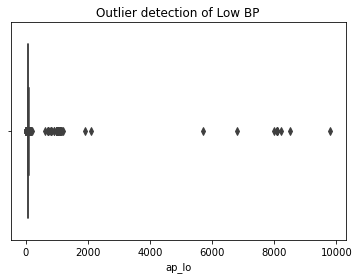

In [50]:
plt.title('Outlier detection of Low BP')
sns.boxplot(ndf.ap_lo)
plt.show()

In [ ]:
ndf.head()

# <h4>Bivariate Analysis</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Relation between Age and Height')
sns.lineplot(ndf['age(in year)'],ndf['height'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Relation between Age and weight')
sns.lineplot(ndf['age(in year)'],ndf['weight'])
plt.show()

In [ ]:
ndf.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age and Low BP")
sns.lineplot(ndf['age(in year)'],ndf['ap_lo'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age and High BP")
sns.lineplot(ndf['age(in year)'],ndf['ap_hi'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age and Cholesterol")
sns.lineplot(ndf['age(in year)'],ndf['cholesterol'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age and Glucose")
sns.lineplot(ndf['age(in year)'],ndf['gluc'])
plt.show()

In [ ]:
ndf.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Weight")
sns.lineplot(ndf.age_group,ndf.weight)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Smoking Trends")
sns.lineplot(ndf.age_group,ndf.smoke)
plt.show()

# <h4>
* 31-40 age groups are more smoking than other the groups
</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and Physically Active")
sns.lineplot(ndf.age_group,ndf.active)
plt.show()

# <h4>
* 21-30 age group patients are more physically active compare to other group.
</h4>

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation between Age Group and High BP")
sns.lineplot(ndf.age_group,ndf.ap_hi)
plt.show()

# <h4>
* 61-70 age group has higher Blood Pressure than other groups.
</h4>

# <center>End</center>